
Привет еще раз, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очередную качественную работу - видно, что приложено много усилий,
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[3]</font>
* Спасибо за усердность!
- Было приятно с тобой сотрудничать.
- Недочеты исправлены - работа полностью корректна
- Не буду больше задерживать, продолжай в том же духе.


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

В ходе проекта мы должны выяснить, какая модель быстрее и точнее сможет предсказать стоимость автомобиля на основании технических характеристик и комплектации.
Сначала мы подготовим данные: проверим типы данных и наличие пропущенных или сильно отклоняющихся значений.
Затем проверим результаты работы модели случайного леса и модели LightGBM с несколькими вариантами гиперпараметров.
В конце выберем лучшую модель на основании скорости обучения и предсказания и значения метрик.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import lightgbm as lgb

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [2]:
try:
    raw_data = pd.read_csv('/datasets/autos.csv')
except:
    raw_data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')
raw_data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
raw_data['LastSeen'] = pd.to_datetime(raw_data['LastSeen'],  format = "%Y/%m/%d")
raw_data['LSYear'] = raw_data['LastSeen'].apply(lambda x: x.strftime('%Y')) 

In [5]:
raw_data['LSYear'].unique()

array(['2016'], dtype=object)

Учли, что выгрузка была сделана в 2016 году.

Приведем данные в порядок - удалим те, что не понадобятся для модели и заменим названия столбцов на более удобный формат.

In [6]:
raw_data = raw_data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'PostalCode', 'LastSeen', 
                     'NumberOfPictures', 'LSYear'], 
                         axis = 1)

In [7]:
raw_data.columns = raw_data.columns.str.lower()
data = raw_data.rename(columns={'vehicletype':'vehicle_type', 
                        'registrationyear':'registration_year',
                        'fueltype':'fuel_type', 
                        'notrepaired':'not_repaired'})

In [8]:
data.columns

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение.
</div>

In [9]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Проверим количество провпущенных значений, чтобы решить, что с ними делать.

In [10]:
data.isna().sum()

price                    0
vehicle_type         37490
registration_year        0
gearbox              19833
power                    0
model                19705
kilometer                0
fuel_type            32895
brand                    0
repaired             71154
dtype: int64

Перед работой с пропущенными значениями посмотрим на распределение числовых признаков и на уникальные значения в каждой колонке.

In [11]:
data['price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

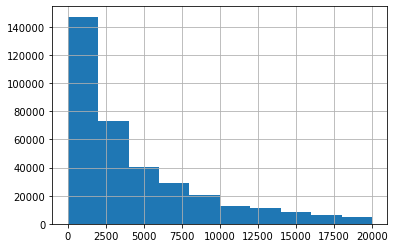

In [12]:
data['price'].hist()

Для цены удалим аномальные значения ниже первого квартиля.

In [13]:
data = data.loc[(data['price'] >= 1050)]

In [14]:
data['price'].describe()

count    266312.000000
mean       5701.434126
std        4520.741277
min        1050.000000
25%        2200.000000
50%        4000.000000
75%        7950.000000
max       20000.000000
Name: price, dtype: float64

In [15]:
data['vehicle_type'].value_counts()

sedan          73025
wagon          52426
small          50012
bus            25750
convertible    18603
coupe          13238
suv            11421
other           2287
Name: vehicle_type, dtype: int64

In [16]:
data['registration_year'].value_counts().sort_index(ascending = False)

9999    5
9000    1
8888    1
8500    1
7800    1
       ..
1500    1
1234    1
1039    1
1001    1
1000    8
Name: registration_year, Length: 122, dtype: int64

Удалим аномалии ранее 1910 года и старше 2016 года (выше мы выяснили, что выгрузка была сделана в 2016 году).

In [17]:
data = data.loc[(data['registration_year'] <= 2016) & (data['registration_year'] >= 1910)]



<div class="alert alert-block alert-info">
<b>Совет:</b> Советую посмотреть на дату выгрузки анкет - там тоже можно увидеть полезную информацию по поводу границ года регистраци.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Учла
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>


In [18]:
data['registration_year'].value_counts().sort_index(ascending = False)

2016    4409
2015    1022
2014    2427
2013    4041
2012    7079
        ... 
1928       2
1927       1
1925       1
1923       2
1910       8
Name: registration_year, Length: 92, dtype: int64

In [19]:
data['gearbox'].value_counts()

manual    190160
auto       57083
Name: gearbox, dtype: int64

In [20]:
data['power'].value_counts()

0       17865
75      13818
150     12143
140     11874
116      9484
        ...  
442         1
1082        1
572         1
1596        1
317         1
Name: power, Length: 609, dtype: int64

(0.0, 500.0)

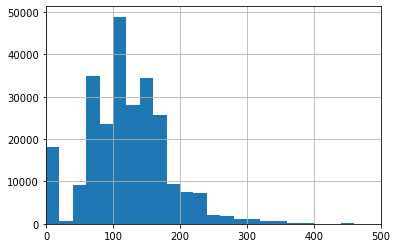

In [21]:
data['power'].hist(bins = 1000)
plt.xlim(0, 500)

In [22]:
data['power'].describe()

count    255957.000000
mean        123.000910
std         190.734365
min           0.000000
25%          80.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: power, dtype: float64

В нуле находится много значений, а первый квартиль равен 69. Удалим все, что ниже первого квартиля и что выше 300 л.с.

In [23]:
data.loc[data['power'] < 69, ['power']] = np.nan
data.loc[data['power'] > 300, ['power']] = np.nan
data['power'].describe()

count    211219.000000
mean        133.766423
std          45.343723
min          69.000000
25%         101.000000
50%         125.000000
75%         160.000000
max         300.000000
Name: power, dtype: float64

<div class="alert alert-block alert-info">
<b>Совет[2]:</b>  Вопрос на подумать: Как думаешь а машины с 0-ой мощностью могут быть просто без двигателя?
</div>



In [24]:
pd.set_option('max_rows', None)
data['model'].value_counts()

golf                  20583
other                 17658
3er                   16084
a4                     8190
passat                 8017
polo                   7138
c_klasse               7031
5er                    6958
astra                  6868
corsa                  5918
e_klasse               5861
a3                     5175
a6                     4948
transporter            4288
focus                  4109
2_reihe                3835
fortwo                 3790
1er                    3365
touran                 3218
fiesta                 3177
a_klasse               3097
zafira                 2569
3_reihe                2354
vectra                 2112
mondeo                 2088
clio                   2077
twingo                 1978
octavia                1941
fabia                  1930
ibiza                  1897
cooper                 1874
megane                 1805
clk                    1687
lupo                   1535
x_reihe                1527
punto               

Удалим редкие значения, которые встречаются менее 50 раз.

In [25]:
threshold = 50

drop = data['model'].value_counts().loc[lambda x: x<threshold].index
drop

Index(['v60', 'croma', 'lodgy', 'terios', 'r19', 'b_max', 'musa', 'delta',
       '9000', 'nubira', 'materia', '200', 'gl', 'q3', 'lanos', 'lybra',
       'amarok', '145', 'kappa', 'move', 'serie_2', 'i3', 'serie_3', 'charade',
       'rangerover', 'samara', 'kalina', 'range_rover_evoque', 'elefantino',
       'serie_1'],
      dtype='object')

In [26]:
data.loc[data['model'].isin(drop), 'model'] = np.nan

In [27]:
data['model'].value_counts()

golf                 20583
other                17658
3er                  16084
a4                    8190
passat                8017
polo                  7138
c_klasse              7031
5er                   6958
astra                 6868
corsa                 5918
e_klasse              5861
a3                    5175
a6                    4948
transporter           4288
focus                 4109
2_reihe               3835
fortwo                3790
1er                   3365
touran                3218
fiesta                3177
a_klasse              3097
zafira                2569
3_reihe               2354
vectra                2112
mondeo                2088
clio                  2077
twingo                1978
octavia               1941
fabia                 1930
ibiza                 1897
cooper                1874
megane                1805
clk                   1687
lupo                  1535
x_reihe               1527
punto                 1521
sharan                1310
c

In [28]:
data['kilometer'].value_counts()

150000    160285
125000     28928
100000     12200
90000       9972
80000       8864
70000       7770
60000       6860
50000       5791
40000       4618
30000       3925
20000       3182
5000        2615
10000        947
Name: kilometer, dtype: int64

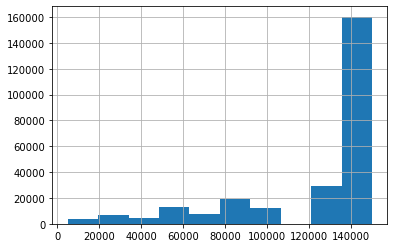

In [29]:
data['kilometer'].hist()

In [30]:
data['kilometer'].describe()

count    255957.000000
mean     125486.136343
std       38379.512738
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Километры пока трогать не будем, чтобы не лишиться большого процента данных.

In [31]:
data['fuel_type'].value_counts()

petrol      148629
gasoline     89447
lpg           4296
cng            479
hybrid         207
other           86
electric        75
Name: fuel_type, dtype: int64

Среди типов топлива есть повторяющееся - petrol и gasoline означают бензин.Оставим только одно название.

In [32]:
data['fuel_type'] = data['fuel_type'].replace(['gasoline'],'petrol')
data['fuel_type'].value_counts()

petrol      238076
lpg           4296
cng            479
hybrid         207
other           86
electric        75
Name: fuel_type, dtype: int64



<div class="alert alert-block alert-info">
<b>Совет:</b> Еще интересно, что среди категорий нет дизеля
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Это мы просто для себя отметили или можем сделать какие-то выводы?
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Правильного ответа нет, но вероятно, это связано с прпоусками в колонке
</div>


In [33]:
data['brand'].value_counts()

volkswagen        55310
bmw               31028
mercedes_benz     27361
audi              24214
opel              23397
ford              15270
renault            9902
peugeot            7782
fiat               5629
skoda              4924
seat               4749
smart              4516
toyota             3968
mazda              3881
citroen            3690
nissan             3159
mini               3032
hyundai            2898
volvo              2252
sonstige_autos     2137
kia                1968
honda              1921
mitsubishi         1746
suzuki             1679
alfa_romeo         1637
chevrolet          1536
chrysler            986
dacia               845
porsche             673
jeep                611
land_rover          519
jaguar              462
subaru              455
saab                382
daihatsu            364
trabant             254
lancia              230
daewoo              225
rover               195
lada                170
Name: brand, dtype: int64

In [34]:
data['repaired'].value_counts()

no     204186
yes     15541
Name: repaired, dtype: int64

Теперь у всего набора данныз удалим строки, в которых менее 8 не NaN значений из 11 колонок. Затем заменим оставшиеся пропущенные значения на Other.

А мощность и цену заполним медианой на основании групп.

In [35]:
data = data.dropna(thresh=8, axis=0)

In [36]:
data.isna().sum()

price                    0
vehicle_type          4352
registration_year        0
gearbox               4046
power                37581
model                 6887
kilometer                0
fuel_type             7376
brand                    0
repaired             28826
dtype: int64

In [37]:
data['vehicle_type'] = data['vehicle_type'].fillna('Other')
data['gearbox'] = data['gearbox'].fillna('Other')
data['model'] = data['model'].fillna('Other')
data['fuel_type'] = data['fuel_type'].fillna('Other')
data['repaired'] = data['repaired'].fillna('Other')

In [38]:
data['power'] = data['power'].fillna(data.groupby('model')['power'].transform('median'))
data['price'] = data['price'].fillna(data.groupby([
    'model', 'vehicle_type', 'repaired'])['price'].transform('median'))

In [39]:
data.isna().sum()

price                  0
vehicle_type           0
registration_year      0
gearbox                0
power                266
model                  0
kilometer              0
fuel_type              0
brand                  0
repaired               0
dtype: int64

Для мощности мы заполнили не все пропущенные значения. Проверим к чему они относятся и заполним их дополнительно.

In [40]:
data[data['power'] != data['power']]

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
5941,2990,small,2005,manual,NaN,seicento,40000,petrol,fiat,Other
9642,1199,small,2000,manual,NaN,seicento,150000,petrol,fiat,no
9974,1200,small,2004,manual,NaN,seicento,150000,petrol,fiat,no
11549,5900,sedan,1989,manual,NaN,601,20000,petrol,trabant,no
14104,1199,small,2002,manual,NaN,seicento,125000,petrol,fiat,no
14200,1290,small,2000,manual,NaN,seicento,150000,petrol,fiat,no
16720,3750,small,1976,manual,NaN,601,40000,petrol,trabant,no
21306,1250,small,1998,manual,NaN,seicento,100000,petrol,fiat,no
21468,4800,sedan,1988,manual,NaN,601,40000,petrol,trabant,no
21997,1299,small,2000,manual,NaN,seicento,50000,petrol,fiat,no


In [41]:
data['power'] = data['power'].fillna(data.groupby('brand')['power'].transform('median'))

In [42]:
data.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64


<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


In [43]:
display(data.shape)
data.head(10)

(246815, 10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,manual,190.0,Other,125000,petrol,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,petrol,jeep,Other
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,petrol,skoda,no
6,2200,convertible,2004,manual,109.0,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125.0,c_max,30000,petrol,ford,Other
10,2000,sedan,2004,manual,105.0,3_reihe,150000,petrol,mazda,no
11,2799,wagon,2005,manual,140.0,passat,150000,petrol,volkswagen,yes
13,2500,wagon,2004,manual,131.0,passat,150000,Other,volkswagen,no
14,17999,suv,2011,manual,190.0,navara,70000,petrol,nissan,no


Теперь все пропуски обработаны и можно переходить к обучению моделей.


<div class="alert alert-block alert-danger">

<b>Ошибка:</b>  Кажется ты прозевала подозрительные значения в колонке мощности и целевом признаком. Пожалуйста обрати на них внимание.
  
</div>



<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо, исправила выше
</div>


<div class="alert alert-block alert-danger">

<b>Ошибка[2]:</b>  Про целевой признак снова забыла... Там есть около-нулевые цены, которые не выглядят адекватно. Как минимум проанализировать это нужно.
</div>



<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Теперь точно разобралась с ней)
</div>

<div class="alert alert-block alert-success">
<b>Успех[3]:</b> Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>


## Обучение моделей

Для начала разделим признаки и целевой признаки.

In [44]:
target = data['price']
features = data.drop('price', axis=1)
features.head(10)

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,coupe,2011,manual,190.0,Other,125000,petrol,audi,yes
2,suv,2004,auto,163.0,grand,125000,petrol,jeep,Other
3,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,small,2008,manual,69.0,fabia,90000,petrol,skoda,no
6,convertible,2004,manual,109.0,2_reihe,150000,petrol,peugeot,no
8,bus,2014,manual,125.0,c_max,30000,petrol,ford,Other
10,sedan,2004,manual,105.0,3_reihe,150000,petrol,mazda,no
11,wagon,2005,manual,140.0,passat,150000,petrol,volkswagen,yes
13,wagon,2004,manual,131.0,passat,150000,Other,volkswagen,no
14,suv,2011,manual,190.0,navara,70000,petrol,nissan,no


Разделим выборки на обучающую, тестовую и валидационную.

In [45]:
features_train, features_other, target_train, target_other = \
train_test_split(features, target, test_size=0.5, random_state=12345) 

features_valid, features_test, target_valid, target_test = \
train_test_split(features_other, target_other, test_size=0.5, random_state=12345) 

In [46]:
for data in [features_train,
             target_train,
             features_valid,
             target_valid,
             features_test,
             target_test]:
    print(data.shape)

(123407, 9)
(123407,)
(61704, 9)
(61704,)
(61704, 9)
(61704,)


In [47]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
34617,suv,2005,auto,163.0,other,150000,petrol,hyundai,yes
62134,sedan,2004,auto,218.0,c_klasse,125000,petrol,mercedes_benz,Other
319768,bus,1997,manual,145.0,galaxy,150000,petrol,ford,no
78189,sedan,2008,manual,177.0,1er,150000,petrol,bmw,no
345180,coupe,2000,manual,170.0,3er,150000,petrol,bmw,Other


Закодируем категориальные признаки с помощью порядкового кодирования.

In [48]:
categorical_cols = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
numerical_cols = features_train.drop(categorical_cols, axis = 1).columns
numerical_cols

Index(['registration_year', 'power', 'kilometer'], dtype='object')

In [49]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
features_train[categorical_cols] = oe.fit_transform(features_train[categorical_cols])
features_valid[categorical_cols] = oe.transform(features_valid[categorical_cols])
features_test[categorical_cols] = oe.transform(features_test[categorical_cols])

In [50]:
display(features_valid.shape)
features_valid.head()

(61704, 9)

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
92368,5.0,1999,2.0,150.0,27.0,150000,6.0,1.0,0.0
103387,8.0,2003,2.0,125.0,39.0,150000,6.0,24.0,1.0
219104,6.0,1996,2.0,128.0,147.0,60000,6.0,21.0,1.0
326509,1.0,2004,1.0,204.0,177.0,150000,6.0,38.0,1.0
279887,5.0,2000,2.0,165.0,27.0,150000,6.0,1.0,2.0


In [51]:
features_train.isna().sum().sum()

0

<div class="alert alert-block alert-danger">

<b>Ошибка:</b>  OHE был бы правильный выбор для линейных моделей. Но для всех других моделей выбор плохой (из-за фактора модели, который порождает много факторов), для заказчика важно время обучения и скорость предсказания, а данные модели могут работать и с другими методами кодировками значительно быстреее, не теряя при этом в качестве.

P.S. Отмечу, что encoder правильно применять после разбиения данных и обучать только на обучающей выборке, для остальных выборок просто использовать transform. Примеры использования с объяснениями можно найти посмотреь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

И не забывай использовать параметр `handle_unknown`
  
</div>



<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо за комментарий. На самом деле при выборе метода я ориентировалась прошлые комментарии и на статьи в интернете, там как раз OneHotEncoder рекомендовали. Еще смотрела на порядковое кодирование, но у наших категориальных данных нет порядка... то есть, например, одна модель не больше, чем другая модель. 
Разбор по ссылке прочла, спасибо. Но почему здесь нужно именно порядковое кодирование не поняла... Плюс в разборе им кодируется только модель автомобилей..    

</div>


<div class="alert alert-block alert-success">
    
<b>Ответ[2]:</b> Наличиее порядка важно для линейных моделей.. А не линейные (в особенности древовидные) - могут интепретировать и номинальные данные, закодированные порядковым способом - для них это проблем не составит.
    
OHE рекомендуются, когда не пораждается огромное количество признаков.
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Теперь понятно, спасибо за объяснение)

</div>

Масштабируем числовые признаки.

In [52]:
numerical_cols = features[['registration_year', 'power', 'kilometer']].columns

scaler = StandardScaler()
scaler.fit(features_train[numerical_cols])
features_train[numerical_cols] = scaler.transform(features_train[numerical_cols])
features_valid[numerical_cols] = scaler.transform(features_valid[numerical_cols])
features_test[numerical_cols] = scaler.transform(features_test[numerical_cols])

In [53]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
34617,7.0,0.196339,1.0,0.733548,147.0,0.640181,6.0,12.0,2.0
62134,5.0,0.038957,1.0,1.939971,55.0,-0.016469,6.0,20.0,0.0
319768,1.0,-1.062716,2.0,0.338718,104.0,0.640181,6.0,10.0,1.0
78189,5.0,0.668484,2.0,1.040637,5.0,0.640181,6.0,2.0,1.0
345180,3.0,-0.590570,2.0,0.887092,9.0,0.640181,6.0,2.0,0.0


Для сравнения моделей возьмем случайный лес и алгоритм LightGBM.

### Случайный лес

In [54]:
%%time
best_model_rfr = None
best_result_rfr = 100000
for est in [100, 200, 500]:
    for depth in [2, 5, 10]:
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth = depth) 
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid)
        result = mean_squared_error(target_valid, predictions_valid)**0.5
        if (result < best_result_rfr):
            best_model_rfr = model 
            best_result_rfr = result 
print('RMSE лучшей модели:', best_result_rfr)
print(f'Лучшая модель: {best_model_rfr}')

RMSE лучшей модели: 2018.6588524494707
Лучшая модель: RandomForestRegressor(max_depth=10, n_estimators=500, random_state=12345)
CPU times: user 2min 26s, sys: 19.5 ms, total: 2min 26s
Wall time: 2min 26s


Проверим время обучения и предсказания отдельно на валидационной выборке.

In [55]:
%%time
model_rfr = RandomForestRegressor(random_state = 12345, n_estimators = 500, max_depth = 10)
model_rfr.fit(features_train, target_train)

CPU times: user 50.3 s, sys: 24.2 ms, total: 50.3 s
Wall time: 50.3 s


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=12345)

In [56]:
%%time
predictions_valid_rfr = model_rfr.predict(features_valid)
predictions_valid_rfr

CPU times: user 1.88 s, sys: 0 ns, total: 1.88 s
Wall time: 1.88 s


array([2187.68170678, 2905.96843116, 3835.89718548, ..., 2806.89333204,
       9367.68569834, 1969.13313721])

In [57]:
rmse_rfr = mean_squared_error(target_valid, predictions_valid_rfr)**0.5
print(f'RMSE Случайного леса: {rmse_rfr}')

RMSE Случайного леса: 2018.6588524494707



<div class="alert alert-block alert-danger">
   
<b>Ошибка:</b>
   
- Тестовую выборку мы не должны использовать при вычислении метрик для анализа. Она должна использоваться только для единственной лучшей модели после анализа  в шаге с тестированием.
- У нас заданы 3 метрики интересующие заказчика: `время обучения: .fit()`, `скорость предсказания: .predict()` и `качество: RMSE`. Эти метрики мы получаем и анализируем отдельно друг от друга (не на тестовой выборке и без учета гиперпаметров) 
- Получить их можем либо с помощью валидационной выборки либо используя кросс-валидационные методы (в GridSearchCV например есть все данные метрики в аттрибуте cv_results_).   В случае если не используется ни gridsearch ни валидационная выборка, то можно время предсказания замерить на тренировочной (качество так замерить нельзя).
- Потом проводится анализ и выбирается ОДНА наилучшая модель.
- И только затем для ОДНОЙ наилучшей модели  проводится тестирование.
  
Исправь пожалуйста это здесь и везде внизу
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Если я правильно поняла, таблицу для сравнения тогда строю по обучающей на .fit() и валидационной на .predict(). А тестовую беру для лучшей модели после всего сравнения ниже.  
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Все верно поняла, молодец!
</div>


__Вывод:__ Выбор лучшей модели случайного леса из матрицы гиперпараметров 3х3 занял 2.5 минуты. Лучшими гиперпараметрами стали число деревьев 500 и максимальная глубина 10. 

Обучения лучшей модели заняло 30 секунд, а предсказание - 2 секунды. Метрика rmse тестовой выборки оказалась выше 2500 и составила 2018.65, что соответствует условию проекта. 

### LightGBM

In [58]:
!pip install lightgbm

In [59]:
%%time
best_model_lgb = None
best_result_lgb = 100000
for est in [100, 200, 500]:
    for depth in [2, 5, 10]:
        model = lgb.LGBMRegressor(random_state=12345, n_estimators=est, max_depth = depth) 
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid)
        result = mean_squared_error(target_valid, predictions_valid)**0.5
        if (result < best_result_lgb):
            best_model_lgb = model 
            best_result_lgb = result 
print('RMSE лучшей модели:', best_model_lgb)
print(f'Лучшая модель: {best_result_lgb}')

RMSE лучшей модели: LGBMRegressor(max_depth=10, n_estimators=500, random_state=12345)
Лучшая модель: 1710.298792939604
CPU times: user 48.6 s, sys: 84.1 ms, total: 48.6 s
Wall time: 6.13 s


In [60]:
%%time
model_lgb = lgb.LGBMRegressor(random_state = 12345, n_estimators = 500, max_depth = 10)
model_lgb.fit(features_train, target_train)

CPU times: user 8.15 s, sys: 24 ms, total: 8.18 s
Wall time: 1.04 s


LGBMRegressor(max_depth=10, n_estimators=500, random_state=12345)

In [61]:
%%time
predictions_valid_lgb = model_lgb.predict(features_valid)

CPU times: user 3.09 s, sys: 4.04 ms, total: 3.09 s
Wall time: 407 ms


In [62]:
rmse_lgb = mean_squared_error(target_valid, predictions_valid_lgb)**0.5

print(f'RMSE LightGBM: {rmse_lgb}')

RMSE LightGBM: 1710.298792939604


__Вывод:__ Выбор лучшей модели LightGBM из матрицы с теми же гиперпараметрами занял меньше времени - 6 секунд. Лучшими гиперпараметрами так же стали число деревьев 500 и максимальная глубина 10.

Обучения лучшей модели заняло 1 секунду, а предсказание - 407 мс. Метрика rmse тестовой выборки оказалась ниже 2500 и составила 1757.46, что подходит нам по условиям проекта.

## Анализ моделей

Соединим посчитанные метрики и время обучения и предсказания по обеим моделям в одну таблицу.

In [66]:
time_quality = pd.DataFrame({'Время проверки параметров': ['2min 26s'],
                            'Время обучения лучшей модели': ['1.04 s'],
                            'Время предсказания лучшей модели': ['1.88 s'],
                            'RMSE тестовой выборки': [rmse_rfr]})
time_quality.loc[len(time_quality)] = ['6.13 s', '407 ms', '407 ms', rmse_lgb]
time_quality.index = ['Случайный лес', 'LightGBM']
round(time_quality, 2)

,Время проверки параметров,Время обучения лучшей модели,Время предсказания лучшей модели,RMSE тестовой выборки
Случайный лес,2min 26s,1.04 s,1.88 s,2018.66
LightGBM,6.13 s,407 ms,407 ms,1733.17


Очевидно, по всем параметрам лидирует модель LightGBM: в то время как проверка гиперпаметров для случайного леса заняла 2.5 минуты, LightGBM справилась с этой задачей за 6 секунд.

Основная метрика, среднеквадратичная ошибка, также оказалась ниже у второй модели и составила 1733.17.

Проверим наилучшую модель на тестовой выборке.

In [67]:
%%time
predictions_test_lgb = model_lgb.predict(features_test)
rmse_lgb = mean_squared_error(target_test, predictions_test_lgb)**0.5

print(f'RMSE LightGBM: {rmse_lgb}')

RMSE LightGBM: 1733.1678589471096
CPU times: user 2.4 s, sys: 4.01 ms, total: 2.4 s
Wall time: 314 ms



<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> На тестовой выборке получены хорошие оценки.
</div>


Модель так же хорошо справилась и с тестовой выборкой, показав среднеквадратичную ошибку 1733.17, что соответствует требованию заказчика.

Посмотрим на влияние признаков.

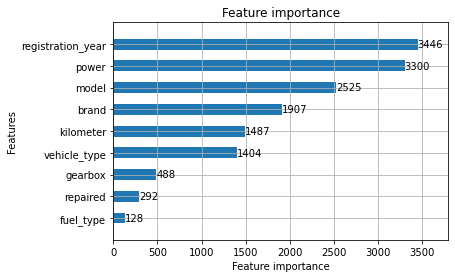

In [68]:
lgb.plot_importance(model_lgb, height=.5)

Больше всего на цену влияют год регистрации, мощность и модель автомобиля. Меньше всего - тип топлива.

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> После анализа и выбора одной наилучшей модели, должно идти  ее тестирование. Другие модели тестовую выборку использовать не должны.
</div>

## Вывод

В этой работе мы строили модель на предсказания стоимости машин на основании технических характеристик и комплектации.

Сначала мы избавились от пропущенных значений, удалив строки, где их больше трех и заполнив категориальные переменные категорией Другое. Далее перед началом работы с моелями мы закодировали категориальные переменные с помощью горячего кодирования и масштабировали числовые признаки. Для сравнения мы рассмотрели две модели - случайный лес и LightGBM.

Замерив время обучения и предсказания, мы выяснили, что LightGBM в разы быстрее справляется с поставленными задачами: на проверку лучшей модели у нее ушло 6 секунд против 2,5 минут у случайного леса. Нашей основной метрикой была среднеквадратичная ошибка, которая у LightGBM составила 1733.17 на валидационной выборке и 1733.17 на тестовой - это ниже, чем у случайного леса и соответствует требованию к модели. При этом, больше всего на цену автомобила повлиял год регистрации, а меньше всего - тип топлива.

Таким образом, для данной задачи рекомендуется использовать именно метод LightGBM.


<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

3) У некоторых моделей семейства бустингов, есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо, на будущее учту! Сейчас успела добавить график важности =)
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b>

1) Отличная реализация!

2) Тут вообще можно для каждого кластера свою модель использовать, и тогда может модели смогут решать узкие задачи более точно, но это всего-лишь гипотеза... нужно пробовать)
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей